## Few Business questions that we are trying to answer with this data:
#### 1. Which countries are most people tweeting from? <br> 2. WHat source have people used while tweeting <br> 3. Most common hash tag used <br> 4. Daily tweets' trend <br> 5. Does most favoritized tweet has any pattern/ trend? <br> 5. Most followed people and their description? <br> 5. What is the sentiment in peoples' tweet? <br> 6. Does the sentiment has any correlation with country?

## Import Libraries and Data Load

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import string
import re
from datetime import datetime
import matplotlib.pyplot as plt
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
import requests
import folium

#! pip install basemap
#! conda install -c conda-forge basemap-data-hires --yes

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tweets/covid19_tweets.csv


In [5]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0",NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,"🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir",2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Exploration Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166656 entries, 0 to 166655
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         166656 non-null  object
 1   user_location     132735 non-null  object
 2   user_description  157190 non-null  object
 3   user_created      166656 non-null  object
 4   user_followers    166656 non-null  int64 
 5   user_friends      166656 non-null  int64 
 6   user_favourites   166656 non-null  int64 
 7   user_verified     166656 non-null  bool  
 8   date              166656 non-null  object
 9   text              166656 non-null  object
 10  hashtags          118917 non-null  object
 11  source            166597 non-null  object
 12  is_retweet        166656 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 14.3+ MB


In [7]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.666560e+05,166656.000000,1.666560e+05
mean,1.086442e+05,2092.492938,1.417986e+04
std,8.337837e+05,8995.094287,4.378791e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.730000e+02,148.000000,2.030000e+02
50%,9.980000e+02,541.000000,1.753000e+03
75%,5.321000e+03,1711.000000,9.154000e+03
max,4.944256e+07,497363.000000,2.047197e+06


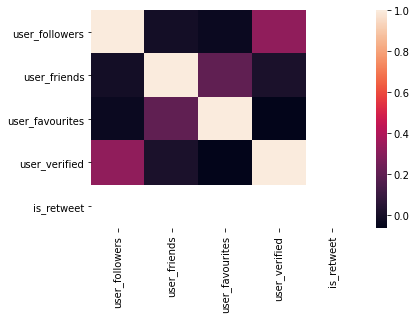

In [8]:
sns.heatmap(df.corr())

## Detailed Analysis

In [41]:
# Make a copy of dataframe before making any changes
tweets = df.copy()

In [42]:
# Convert date columns to datetime data type from object
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['user_created'] = pd.to_datetime(tweets['user_created'])
tweets['date_ext'] = tweets['date'].dt.date


In [43]:
# Take care of nulls in location and description
tweets.user_location.fillna('Unknown', inplace=True)
tweets.user_description.fillna('Unknown', inplace=True)
tweets.source.fillna('Unknown', inplace=True)
tweets.hashtags.fillna('None', inplace=True)

In [44]:
# Verify
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166656 entries, 0 to 166655
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         166656 non-null  object        
 1   user_location     166656 non-null  object        
 2   user_description  166656 non-null  object        
 3   user_created      166656 non-null  datetime64[ns]
 4   user_followers    166656 non-null  int64         
 5   user_friends      166656 non-null  int64         
 6   user_favourites   166656 non-null  int64         
 7   user_verified     166656 non-null  bool          
 8   date              166656 non-null  datetime64[ns]
 9   text              166656 non-null  object        
 10  hashtags          166656 non-null  object        
 11  source            166656 non-null  object        
 12  is_retweet        166656 non-null  bool          
 13  date_ext          166656 non-null  object        
dtypes: b

In [45]:
# Attempt tp clean the location column. There are many other business rules that can be applied to 
# improve the accuracy of different cases. We can also use regular expressions

# If both country and city is mentioned

tweets["country"] = tweets.user_location.apply(lambda x: x.split(",")[-1].strip() \
                                            if ("," in x) else x)
tweets["city"] = tweets.user_location.apply(lambda x: x.split(",")[0].strip() \
                                            if ("," in x) else x)

# Replacing 2 digit US states with USA except UK
tweets["country"] = tweets.country.apply(lambda x: 'USA' if len(x.lower().strip())<3 and x!='uk' else x)

# Standarizing case senstive cases
tweets["country"] = tweets.country.apply(lambda x: 'USA' if x.lower().strip() in \
                                      ("united states, usa, us") else x)
tweets["country"] = tweets.country.apply(lambda x: 'India' if x.lower().strip() in \
                                      ("india") else x)

In [57]:
tweets["city"] = tweets.city.apply(lambda x: 'Unknown' if x.lower() in \
                                   ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us'] \
                                   else x)

In [46]:
# tweets.country.value_counts().to_frame().style.bar()
# tweets.city.value_counts().to_frame().style.bar()

#### We see that US and India are the top countries from where most of the people have tweeted with USA being significantly higher. The top 5 cities with highest tweets are London, New Delhi, New York, Mumbai, Washington.

## Plot heatmap to see the geographical distribution based on number of tweets

In [16]:
# Taking top 100 countries and cities excluding the unknown at index 0
top100_count = tweets.country.value_counts(sort=True, ascending=False)[1:101]
top100_count = pd.DataFrame(top100_count)

top100_city= tweets.city.value_counts(sort=True, ascending=False)[1:101]
top100_city = pd.DataFrame(top100_city)

In [17]:
def get_coordinates(input_type, name, output_as='center'):
     # create url
    if input_type == "country":
        url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',name,'&format=json&polygon=0')
    elif input_type == "city":
        url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?city=',name,'&format=json&polygon=0')
    response = requests.get(url)
    
    try:
        response = response.json()[0]
        # parse response to list
        if output_as == 'boundingbox':
            lst = response[output_as]
            output = [float(i) for i in lst]
        if output_as == 'center':
            lst = [response.get(key) for key in ['lat','lon']]
            output = [float(i) for i in lst]
        return output
    
    except (IndexError, ValueError):
        # this will log the whole traceback
        return [0,0]

In [18]:
# Get the latitudes and longitudes for the top 100 countries and cities
lat_long_count = [get_coordinates("country",coun) for coun in top100_count.index]
lat_long_city = [get_coordinates("city",city) for city in top100_city.index]

In [19]:
# Call the get_coodinates() and drop the duplicates from dataframe
def top100_df(input_type,df,lat_long):
    # merge lat and long with original dataframe
    for i, pair in zip(df.index, lat_long):
        df.loc[i,'lat'] = pair[0]
        df.loc[i,'long'] = pair[1] 
    # reset the index as country names
    df.reset_index(level=0, inplace=True)
    if input_type=="country":
        df.rename(columns={"country":"# of tweets","index":"country"}, inplace=True)
    elif input_type=="city":
        df.rename(columns={"city":"# of tweets","index":"city"}, inplace=True)
    # drop the countries/ cities with unidetified and duplicated latitudes and longitudes
    df.drop_duplicates(subset=['lat','long'],inplace=True)
    return df

In [20]:
# Call the top100_df() to finalize the country and city dataframes 
top100_count = top100_df("country",top100_count,lat_long_count)
top100_city = top100_df("city",top100_city,lat_long_city)

In [21]:
# Create a heatmap using folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap

def color(magnitude):
    if magnitude>=2000:
        col='red'
    elif (magnitude>=500 and magnitude<2000):
        col='beige'
    elif magnitude<500:
        col='green'
    return col

def generateBaseMap(input_type,df,default_location=[40.693943, -73.985880], default_zoom_start=2):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    marker_cluster = plugins.MarkerCluster().add_to(base_map)
    
    HeatMap(data=df[['lat','long']].values.tolist(),radius=20,max_zoom=13).add_to(base_map)
    for lat,lan,tweet,name in zip(df['lat'],df['long'],df['# of tweets'],df.iloc[:,0]): 
        # Marker() takes location coordinates as a list as an argument 
        folium.Marker(location=[lat,lan],popup = [name,tweet], 
                      icon= folium.Icon(color=color(tweet), 
                      icon_color='white', icon='twitter', prefix='fa')).add_to(marker_cluster)
    #specify the min and max values of your data
    min, max = df['# of tweets'].min(), df['# of tweets'].max()
    colormap = cm.LinearColormap(colors=['green','beige','red'], vmin=min,vmax=max)
    if input_type=='country':
        colormap.caption = 'Country '+'distribution of COVID-19 tweets'
    elif input_type=='city':
         colormap.caption = 'City '+'distribution of COVID-19 tweets'
    colormap.add_to(base_map)
    return base_map

In [22]:
generateBaseMap('country',top100_count)

In [23]:
generateBaseMap('city',top100_city)

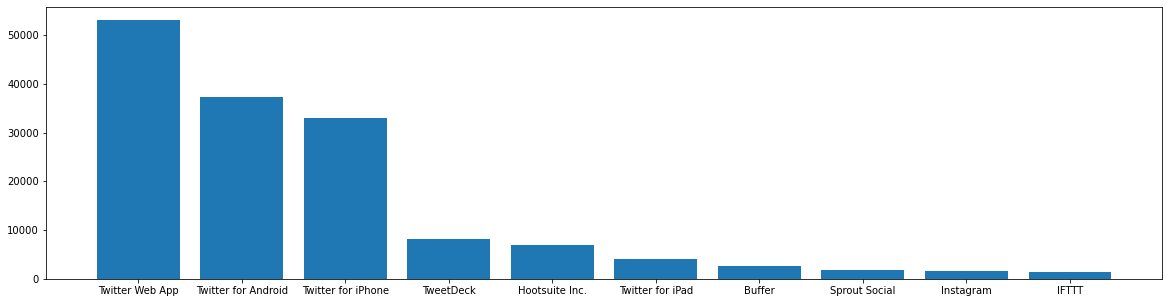

In [24]:
# Compare the tweet source
top10_source = tweets.source.value_counts().nlargest(10)
# initiate the figure with it's size
fig = plt.figure(figsize = (20,5))
plt.bar(top10_source.index, top10_source.values);

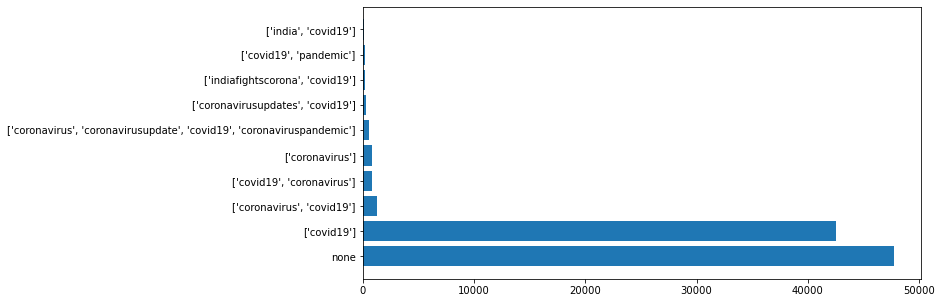

In [25]:
# Most trended hashtags
top10_hashtags = tweets.hashtags.str.lower().value_counts().nlargest(10)
# initiate the figure with it's size
fig = plt.figure(figsize = (10,5))
plt.barh(top10_hashtags.index, top10_hashtags.values);
#plt.xticks(rotation=90);

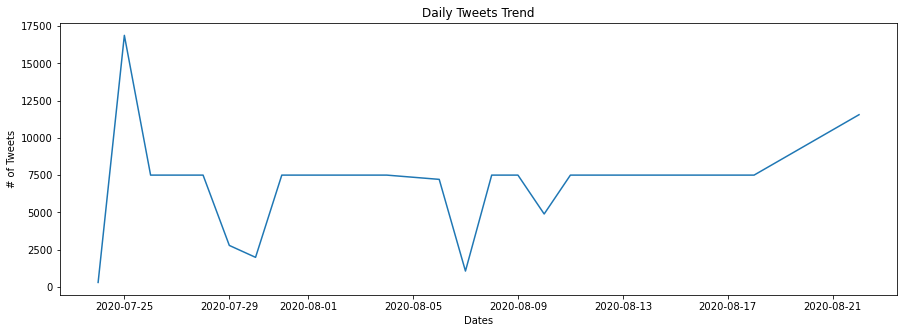

In [26]:
# Daily tweet trend
daily_tweets = tweets.groupby(['date_ext'])['text'].count()

fig = plt.figure(figsize = (15,5))
plt.plot(daily_tweets.index,daily_tweets.values)
plt.title('Daily Tweets Trend')
plt.xlabel('Dates')
plt.ylabel('# of Tweets')
plt.show()

In [27]:
# five largest values in column tweets 
tweets.nlargest(10, ['user_favourites'])[['user_name','text']]

,user_name,text
14504,Chelsea Anderson.♥️,So Trump wants everyone else's child to get #COVID19 but his son Baron gets an exception now that's messed up!!! 😡😤 https://t.co/hq5eZGjGY2
148145,Patty,Herd immunity at 20% is still too high and would risk too many lives. A vaccine or therapeutics to lessen the sympt… https://t.co/01ThSD2khl
148540,Patty,"Sounds like the need for a booster shot, once a vaccine is made, for #COVID19 might be necessary based on this info… https://t.co/64hnbXS1mp"
156746,paolo ignazio marong,Il rapporto tra casi accertati e mortalità è elevato #covid19 #Victoria #Australia Coronavirus updates LIVE: Victor… https://t.co/5Imw3WX6Rq
141621,paolo ignazio marong,"Focolai legati a chiese #CoreadelSud #Covid19 S. Korea adds 197 more cases of COVID-19; total at 15,515 https://t.co/t7NiULhjAu"
141678,paolo ignazio marong,Mortalità molto elevata rispetto ai casi #covid19 Coronavirus updates LIVE: Victoria records 282 new COVID-19 cases… https://t.co/mIP4MZPkZw
133921,paolo ignazio marong,"Dati costanti #covid19 #HongKong third wave: latest infections linked to container port cluster, as city faces abou… https://t.co/SFnPgUTd72"
112744,paolo ignazio marong,Continue oscillazioni attorno ai 30-50 casi al giorno #Covid19 New daily virus cases spike to over 50 on church-li… https://t.co/Y77SU3A3LZ
91661,paolo ignazio marong,E anche arrivando rapidamente il vaccino... #covid19 Covid-19: only half of Britons would definitely have vaccinati… https://t.co/0RtDrUYoqY
90134,paolo ignazio marong,Ancora lockdown mirati nel Regno Unito #Covid19 Coronavirus live news: UK recalls home tests over safety concerns a… https://t.co/Xq9zKq1HJ3


In [77]:
# Top 10 followed twitter accounts
tweets.nlargest(10, ['user_followers'])[['user_name','text','user_followers']]
#tweets.query("user_followers == user_followers.max()")[['user_name','text']]

,user_name,text,user_followers
104946,CNN,"""Thought I'd show you what #Covid19 does to your hair... Please take this seriously.""\n\nAlyssa Milano revealed that… https://t.co/tsVc9daWfQ",49442559
6959,CGTN,#VoicesfromBeltandRoad: #COVID19 rap song alerts to needed precautions when returning to work https://t.co/pt4ICXWkTY,13892841
13450,CGTN,"#China's civil aviation recovers as daily flights increase\n\nThe daily number of civil aviation flights reached 13,0… https://t.co/nZdYxPjXtJ",13892839
16194,CGTN,"On Friday, the #Chinese mainland reported:\n \n- 29 local transmissions (20 in #Xinjiang Uygur Autonomous Region, nin… https://t.co/4XbxuZtOnK",13892837
235,CGTN,"#APEC reaffirms #COVID19 economic recovery priorities, movement of essential goods https://t.co/sWRE9l9Fss",13892795
2837,CGTN,#COVID19 recovery can take weeks even for young adults: U.S. study https://t.co/PcMFwm5670,13892793
5344,CGTN,"#HongKong reports 133 new confirmed #COVID19 cases, hitting a new daily high https://t.co/lLEv2zkfdz https://t.co/oj2gmlZW8J",13892792
20378,CGTN,"Global #COVID19 cases have surpassed 16 million on Sunday, according to Johns Hopkins University's tally. https://t.co/jbRHIOYXvR",13892212
20483,CGTN,#COVID19 #HongKong SAR government introduces new rules limiting ship crew movement \n\nmore: https://t.co/jvagMjjN6r https://t.co/54vBXDjlri,13892212
23721,CGTN,"#DPRK sees 1st suspected #COVID19 case, adopts maximum emergency system \n\nmore: https://t.co/rj7LFJBTaa https://t.co/HnLyxr3cux",13892212


#### CNN and CGTN are the top 2 twitter accounts to be followed with CNN having over 49m and CGTN having over 13m followers

## Check sentiment of tweets
### Step 1: Preprocessing text

In [29]:
#from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [49]:
# Delete the http link from the tweets to remove noise
sep = 'http'
tweets['clean_text'] = tweets['text'].apply(lambda x: str(x).split(sep, 1)[0])

In [33]:
# Normalize the text, convert everything other than a-z, A-Z, 0-9 to space
tweets['nor_text'] = tweets['text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]"," ", x))

In [34]:
# Tokenize the normalized texts using TweetTokenizer which is specifically for tweets
tt = TweetTokenizer()
tweets['tokenized_text'] = tweets['nor_text'].apply(tt.tokenize)
#word_tokenize

In [35]:
# Remove stopwords
tweets['stopwords_text'] = tweets['tokenized_text'].\
    apply(lambda x: [item for item in x if item not in stopwords.words("english")])

In [36]:
# Identify the part of speech for all the tweets
# tweets['pos_text'] = tweets['stopwords_text'].apply(pos_tag)
# tweets['ne_text'] = tweets['pos_text'].apply(ne_chunk)
# tweets['stem_text'] = tweets['stopwords_text'].apply(lambda x: [PorterStemmer().stem(w) for w in x])

In [37]:
# Lemmatize the tweets to get to their root words
tweets['lemm_text'] = tweets['stopwords_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(w) \
                                                                for w in x])

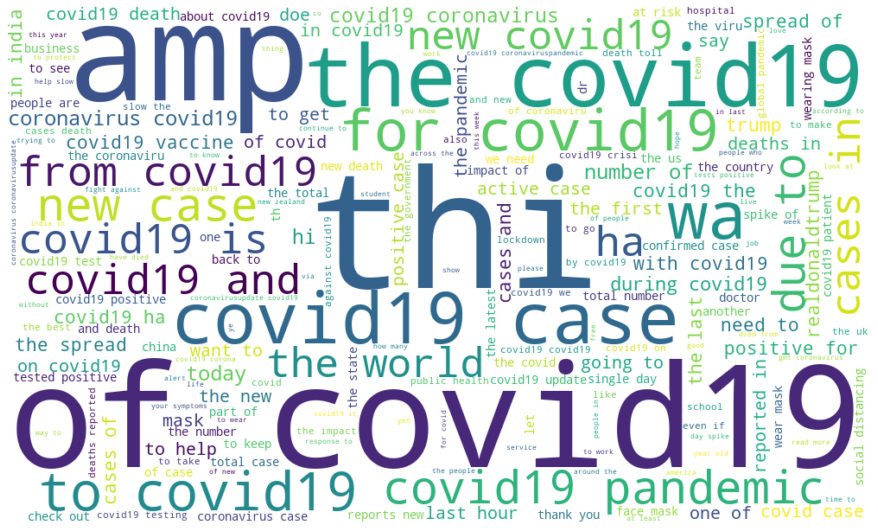

In [55]:
# Create a wordcloud for most popular words in tweets

# ! pip install wordcloud
from wordcloud import WordCloud

text = '' 
stop_words = set(stopwords.words("english"))
for row in tweets['clean_text']:
    # typecaste each row to string and split it to get tokens
    tokens = str(row).split()
    #row = row.replace("'", "")
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    text += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 600, 
                      background_color ='white', 
                      stopwords=stop_words).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Step 2: Feature Extraction

In [ ]:
"""nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_score(text):
    dict_res = sid.polarity_scores(text)
    return dict_res["compound"]

df["Score"] = df["text_clean"].apply(lambda x: get_score(x))  

df['date'] = pd.to_datetime(df['date'])
dates = np.array(df['date'])
indices = np.argsort(dates)[10000:]
window = 750

dates = dates[indices][window:]
values = np.array(df['Score'])[indices]
windows = pd.Series(values).rolling(window)
moving_averages = windows.mean()[window:]

plt.figure(figsize=(20,9))
plt.plot(dates, moving_averages, color='blue', label='Average Sentiment')
plt.title('Analysis of Tweets')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend();"""

In [56]:
# check size of notebook
!ls -lh

total 4.0K
---------- 1 root root 263 Aug 24 23:50 __notebook_source__.ipynb


## References
- https://stackoverflow.com/questions/44173624/how-to-apply-nltk-word-tokenize-library-on-a-pandas-dataf**rame-for-twitter-data
- https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#text
- https://zapcircle.net/geomapping-with-python/
- https://matplotlib.org/basemap/users/geography.html
- https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
- https://colab.research.google.com/drive/1HJB7UGj7YuUEJi-cKZRAr3O4Dlym2KrP#scrollTo=0H-uRYF1iIjS
- https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot
- https://www.geeksforgeeks.org/generating-word-cloud-python/
- 
    

In [3]:
! jupyter trust covid19-tweets.ipynb

Signing notebook: covid19-tweets.ipynb
